# General system and one Buttiker lead added.

In [37]:
import kwant
import math
import cmath
from matplotlib import pyplot as plt
import numpy as np
import tinyarray


from scipy import optimize
import scipy
import time

In [38]:
import sys
# insert your own path to modules
sys.path.insert(0, 'path_to_Modules')

#### Plot functions 

In [39]:
import PlotFunctions

# Gold System Magnetized lead

In [40]:
import AuSHel_MagnetizedGoldLead_2T

In [41]:


# Gold-Sulfur-Helicene system with left magnetized lead
def make_gold_system(B = 2,
                     nlayers = 3, xi_d = 0.6, xi_p = 0.006,
                    Txz = 3,Tyz = 3,d_L= 50,
                    txz_left_1=1,tyz_left_1=0,
                    txz_left_2=1,tyz_left_2=1,
                    txz_left_3=0,tyz_left_3=1,
                    plot_left = False,
                    txz_right_1=1,tyz_right_1=0, 
                    txz_right_2=1,tyz_right_2=1,
                    txz_right_3=0,tyz_right_3=1,
                    plot_right = False,
                    nrings =6 ,tvec=3,E_z=0,r=1.4,zstart=0,b=3.6,
                    chirality_left=True,
                    u=-18+9.9 ,delta_e=-12.6,Es=-6.21):
    
    
    
    system = AuSHel_MagnetizedGoldLead_2T.make_system_right(nlayers, xi_d,xi_p ,
                Txz,Tyz, d_L,
                 txz_left_1,tyz_left_1,
                txz_left_2,tyz_left_2,
                txz_left_3,tyz_left_3,
                plot_left,
                txz_right_1,tyz_right_1, 
                txz_right_2,tyz_right_2,
                txz_right_3,tyz_right_3,
                plot_right ,
                nrings ,tvec,E_z,r,zstart,b,
                chirality_left,
                u,delta_e,Es,
                           B)
    
    
    
    
    systemf = system.finalized()
    return systemf

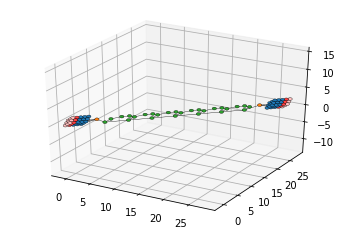

In [42]:
kwant.plot(make_gold_system(),hop_lw=0.1);

#  Charge Current

Import notebook to calculate currents

In [43]:
import CalculateCurrentN

# Calculate Transmissions

### System parameters

In [44]:
de = 0.12  # stepsize of energy grid
B  = 2.1   # magnetization

ef = -5.3 # Fermi Energy
nleads = 2 # Number of lead attached to scattering region

### Bias window parameters

In [45]:

#maximum voltage
Vmax = 2

#bias window
emin = ef -Vmax/2
emax = ef + Vmax/2

#Voltages for which we calculate current
V_list = np.linspace(0,Vmax,10)

# System positive magnetization: +|B|

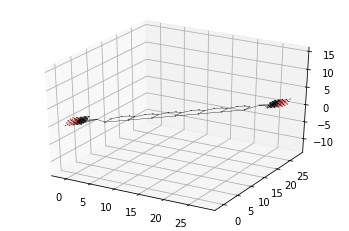

In [46]:


systemf_P =  make_gold_system(B = abs(B))

kwant.plot(systemf_P,site_size=0.1,hop_lw=0.1);



### Calculate Transmissions for positive magnetization

In [47]:
list_tags_transmissions_P = []

start_time = time.time()


for lead_i in range(nleads):
    print(lead_i)
    
    energies, Tij_list_i,tag_list_ij_i  = CalculateCurrentN.Tij(systemf_P,lead_i =lead_i,n_leads=nleads,
                                              emin=emin,emax=emax, de=de,
                                              plot_var=False,check_hermiticity=True)

    energies, Tji_list_i,tag_list_ji_i   = CalculateCurrentN.Tji(systemf_P,lead_i =lead_i,n_leads=nleads,
                                              emin=emin,emax=emax, de=de,
                                              plot_var=False,check_hermiticity=True)

    list_tags_transmissions_P.append([ Tij_list_i,tag_list_ij_i, Tji_list_i,tag_list_ji_i ])
    
    
print("--- %s seconds ---" % (time.time() - start_time)) 



0
1
--- 10.954853296279907 seconds ---


In [48]:
TLRp_list = list_tags_transmissions_P[0][0][0]
TRLp_list = list_tags_transmissions_P[0][2][0]

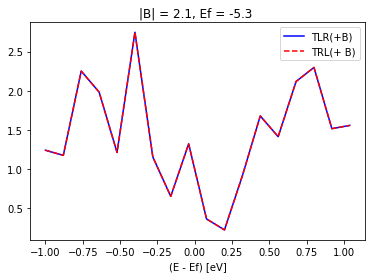

In [49]:
plt.title('|B| = {}, Ef = {} '.format(abs(np.round(B,1)),ef))

plt.plot(energies - ef ,TLRp_list,label = 'TLR(+B)',color = 'blue')
plt.plot(energies - ef,TRLp_list,label = 'TRL(+ B)',color = 'red', linestyle = '--')


plt.legend()

plt.xlabel("(E - Ef) [eV]")
plt.show() 

# System negative magnetization: -|B|

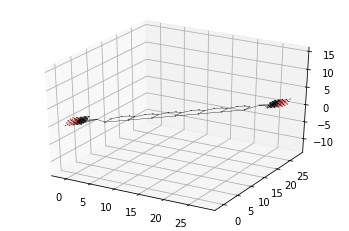

In [13]:
systemf_M =  make_gold_system(B = -abs(B))

kwant.plot(systemf_M,site_size=0.1,hop_lw=0.1);



### Calculate Transmissions for negative magnetization

In [14]:
start_time = time.time()

list_tags_transmissions_M = []
for lead_i in range(nleads):
    print(lead_i)
    
    energies, Tij_list_i,tag_list_ij_i  = CalculateCurrentN.Tij(systemf_M,lead_i =lead_i,n_leads=nleads,
                                              emin=emin,emax=emax, de=de,
                                              plot_var=False,check_hermiticity=True)

    energies, Tji_list_i,tag_list_ji_i   = CalculateCurrentN.Tji(systemf_M,lead_i =lead_i,n_leads=nleads,
                                              emin=emin,emax=emax, de=de,
                                              plot_var=False,check_hermiticity=True)

    list_tags_transmissions_M.append([ Tij_list_i,tag_list_ij_i, Tji_list_i,tag_list_ji_i ])
    
    
print("--- %s seconds ---" % (time.time() - start_time)) 

0
1
--- 12.091490983963013 seconds ---


In [15]:
TLRm_list = list_tags_transmissions_M[0][0][0]
TRLm_list = list_tags_transmissions_M[0][2][0]

# Plot Transmissions

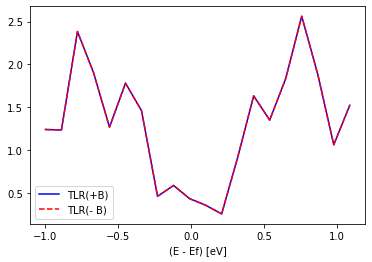

In [17]:

plt.plot(energies - ef ,TLRp_list,label = 'TLR(+B)',color = 'blue')
plt.plot(energies - ef,TLRm_list,label = 'TLR(- B)',color = 'red', linestyle = '--')


plt.legend()

plt.xlabel("(E - Ef) [eV]")
plt.show() 

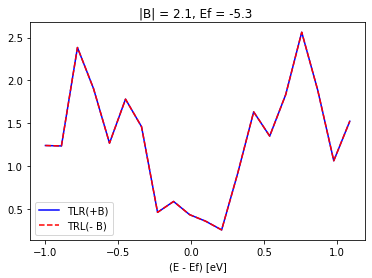

In [19]:
plt.title('|B| = {}, Ef = {} '.format(abs(np.round(B,1)),ef))

plt.plot(energies - ef ,TLRp_list,label = 'TLR(+B)',color = 'blue')
plt.plot(energies - ef,TRLm_list,label = 'TRL(- B)',color = 'red', linestyle = '--')


plt.legend()

plt.xlabel("(E - Ef) [eV]")
plt.show() 

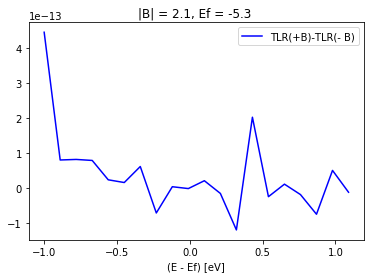

In [20]:
plt.title('|B| = {}, Ef = {} '.format(abs(np.round(B,1)),ef))

plt.plot(energies - ef ,np.subtract(TLRp_list,TLRm_list),label = 'TLR(+B)-TLR(- B)',color = 'blue')
# plt.plot(energiesR - ef,TLRm_listR,label = '',color = 'red', linestyle = '--')


plt.legend()

plt.xlabel("(E - Ef) [eV]")
plt.show() 

### Save Values: Transmissions

In [21]:
# file = open("TLRp_list{}_de_{}_ef_{}.txt".format(abs(B),de,ef),'w')
# np.savetxt(file,TLRp_list )
# file.close()

# file = open("TLRm_list{}_de_{}_ef_{}.txt".format(abs(B),de,ef),'w')
# np.savetxt(file,TLRm_list )
# file.close()

# file = open("TRLp_list{}_de_{}_ef_{}.txt".format(abs(B),de,ef),'w')
# np.savetxt(file,TRLp_list )
# file.close()


# file = open("TRLm_list{}_de_{}_ef_{}.txt".format(abs(B),de,ef),'w')
# np.savetxt(file,TRLm_list )
# file.close()


## Calculate Currents

# $I_L(m)$

In [63]:
IL_list_p = []
lead_i    = 0 # Left lead
Tij_list,tag_list_ij, Tji_list,tag_list_ji = list_tags_transmissions_P[lead_i]

for n in range(len(V_list)):
    
    
    muB_list = []
    V        = V_list[n]
   
    
    # Generate mus for voltage V
    mu_list_object = CalculateCurrentN.mu_list_generate(muB_list,ef,V,nleads)
    
    # Generate tags j for lead i s.t. the chemical potential muj corresponds to the correct transmission
    tagsi_j_list = CalculateCurrentN.tags_list(nleads, lead_i)
    
    #mus for lead i (i=0)
    mui_j_list = [mu_list_object[n] for n in tagsi_j_list]
    mui = mu_list_object[lead_i]
    
    # Current into lead 0 
    # if current into general lead n is desired, 
    Ii_cur = CalculateCurrentN.Ii_current(mui,mui_j_list,
               tag_list_ij,tag_list_ji,
               energies,
               Tij_list,Tji_list,
               systemf_P,nleads)
    
    IL_list_p.append(Ii_cur)
    
    print('V = {}, I = {}'.format(V,Ii_cur))

V = 0.0, I = 4.085620730620576e-14
V = 0.2222222222222222, I = 0.09741191211586209
V = 0.4444444444444444, I = 0.19133987927035268
V = 0.6666666666666666, I = 0.36599254670625947
V = 0.8888888888888888, I = 0.6935256657710541
V = 1.1111111111111112, I = 1.0276593230701456
V = 1.3333333333333333, I = 1.3872906585699556
V = 1.5555555555555554, I = 1.878858631869921
V = 1.7777777777777777, I = 2.3158739820838523
V = 2.0, I = 2.6041183817108062


# $I_R(m)$

In [64]:
IR_list_p = []
lead_i    = 1 # Right lead
Tij_list,tag_list_ij, Tji_list,tag_list_ji = list_tags_transmissions_P[lead_i]

for n in range(len(V_list)):
    
    
    muB_list = []
    V        = V_list[n]
   
    
    # Generate mus for voltage V
    mu_list_object = CalculateCurrentN.mu_list_generate(muB_list,ef,V,nleads)
    
    # Generate tags j for lead i s.t. the chemical potential muj corresponds to the correct transmission
    tagsi_j_list = CalculateCurrentN.tags_list(nleads, lead_i)
    
    #mus for lead i (i=0)
    mui_j_list = [mu_list_object[n] for n in tagsi_j_list]
    mui = mu_list_object[lead_i]
    
    # Current into lead 0 
    # if current into general lead n is desired, 
    Ii_cur = CalculateCurrentN.Ii_current(mui,mui_j_list,
               tag_list_ij,tag_list_ji,
               energies,
               Tij_list,Tji_list,
               systemf_P,nleads)
    
    IR_list_p.append(Ii_cur)
    
    print('V = {}, I = {}'.format(V,Ii_cur))

V = 0.0, I = -4.085620730620576e-14
V = 0.2222222222222222, I = -0.09741191211586209
V = 0.4444444444444444, I = -0.19133987927035268
V = 0.6666666666666666, I = -0.36599254670625947
V = 0.8888888888888888, I = -0.6935256657710541
V = 1.1111111111111112, I = -1.0276593230701456
V = 1.3333333333333333, I = -1.3872906585699556
V = 1.5555555555555554, I = -1.878858631869921
V = 1.7777777777777777, I = -2.3158739820838523
V = 2.0, I = -2.6041183817108062


## $I_L(-m)$

In [65]:
IL_list_m = []
lead_i    = 0 # Left lead
Tij_list,tag_list_ij, Tji_list,tag_list_ji = list_tags_transmissions_M[lead_i]

for n in range(len(V_list)):
    
    
    muB_list = []
    V        = V_list[n]
   
    
    # Generate mus for voltage V
    mu_list_object = CalculateCurrentN.mu_list_generate(muB_list,ef,V,nleads)
    
    # Generate tags j for lead i s.t. the chemical potential muj corresponds to the correct transmission
    tagsi_j_list = CalculateCurrentN.tags_list(nleads, lead_i)
    
    #mus for lead i (i=0)
    mui_j_list = [mu_list_object[n] for n in tagsi_j_list]
    mui = mu_list_object[lead_i]
    
    # Current into lead 0 
    # if current into general lead n is desired, 
    Ii_cur = CalculateCurrentN.Ii_current(mui,mui_j_list,
               tag_list_ij,tag_list_ji,
               energies,
               Tij_list,Tji_list,
               systemf_M,nleads)
    
    IL_list_m.append(Ii_cur)
    
    print('V = {}, I = {}'.format(V,Ii_cur))

V = 0.0, I = -1.3988810110276972e-14
V = 0.2222222222222222, I = 0.09741191211580258
V = 0.4444444444444444, I = 0.1913398792702965
V = 0.6666666666666666, I = 0.36599254670621795
V = 0.8888888888888888, I = 0.6935256657710082
V = 1.1111111111111112, I = 1.0276593230700843
V = 1.3333333333333333, I = 1.3872906585698948
V = 1.5555555555555554, I = 1.8788586318698548
V = 1.7777777777777777, I = 2.315873982083792
V = 2.0, I = 2.6041183817107494


## $I_R(-m)$

In [66]:
IR_list_m = []
lead_i    = 1 #Right lead
Tij_list,tag_list_ij, Tji_list,tag_list_ji = list_tags_transmissions_M[lead_i]

for n in range(len(V_list)):
    
    
    muB_list = []
    V        = V_list[n]
   
    
    # Generate mus for voltage V
    mu_list_object = CalculateCurrentN.mu_list_generate(muB_list,ef,V,nleads)
    
    # Generate tags j for lead i s.t. the chemical potential muj corresponds to the correct transmission
    tagsi_j_list = CalculateCurrentN.tags_list(nleads, lead_i)
    
    #mus for lead i (i=0)
    mui_j_list = [mu_list_object[n] for n in tagsi_j_list]
    mui = mu_list_object[lead_i]
    
    # Current into lead 0 
    # if current into general lead n is desired, 
    Ii_cur = CalculateCurrentN.Ii_current(mui,mui_j_list,
               tag_list_ij,tag_list_ji,
               energies,
               Tij_list,Tji_list,
               systemf_M,nleads)
    
    IR_list_m.append(Ii_cur)
    
    print('V = {}, I = {}'.format(V,Ii_cur))

V = 0.0, I = 1.3988810110276972e-14
V = 0.2222222222222222, I = -0.09741191211580258
V = 0.4444444444444444, I = -0.1913398792702965
V = 0.6666666666666666, I = -0.36599254670621795
V = 0.8888888888888888, I = -0.6935256657710082
V = 1.1111111111111112, I = -1.0276593230700843
V = 1.3333333333333333, I = -1.3872906585698948
V = 1.5555555555555554, I = -1.8788586318698548
V = 1.7777777777777777, I = -2.315873982083792
V = 2.0, I = -2.6041183817107494


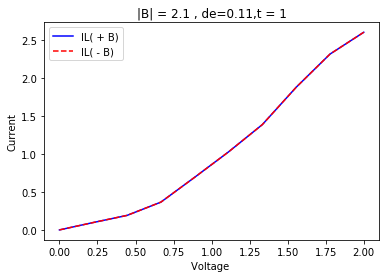

In [67]:
plt.title('|B| = {} '.format(abs(np.round(B,1))))





plt.plot(V_list, IL_list_p,label='IL( + B)',color = 'blue')
plt.plot(V_list,IL_list_m,label='IL( - B)',color ='red', linestyle = '--')


plt.legend()
plt.ylabel('Current')
plt.xlabel('Voltage ')

plt.show()



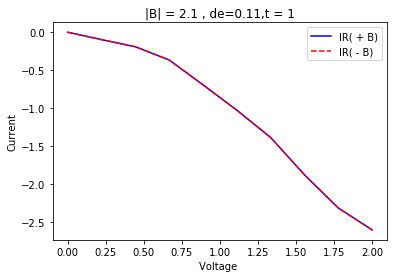

In [68]:

plt.title('|B| = {} '.format(abs(np.round(B,1))))






plt.plot(V_list, IR_list_p,label='IR( + B)',color = 'blue')
plt.plot(V_list,IR_list_m,label='IR( - B)',color ='red', linestyle = '--')


plt.legend()
plt.ylabel('Current')
plt.xlabel('Voltage ')

plt.show()




# $\Delta I(m) = I_L(m)- I_L(-m)$

<>:7: DeprecationWarning: invalid escape sequence \D
<>:7: DeprecationWarning: invalid escape sequence \D
<>:7: DeprecationWarning: invalid escape sequence \D
<ipython-input-69-e76b0c905bd8>:7: DeprecationWarning: invalid escape sequence \D
  plt.plot(V_list, np.subtract(IL_list_p,IL_list_m),label='$\Delta$ IL(+)-IL(-)',color = 'purple')


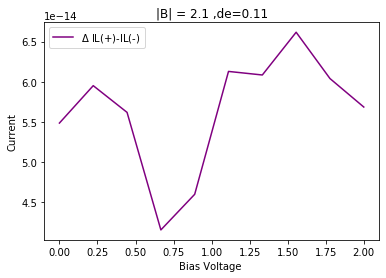

In [69]:
plt.title('|B| = {} ,de={}'.format(abs(np.round(B,1)),np.round(de,3)))





plt.plot(V_list, np.subtract(IL_list_p,IL_list_m),label='\Delta I',color = 'purple')


plt.legend()
plt.ylabel('Current')
plt.xlabel('Bias Voltage ')

plt.show()

# Check: $I_L + I_R = 0$

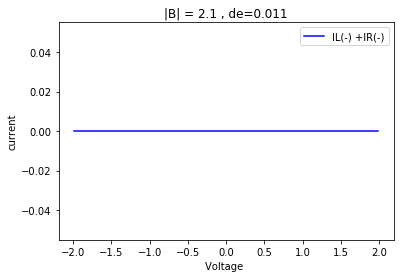

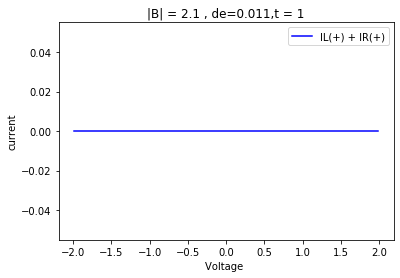

In [38]:
plt.title('|B| = {} , de={}'.format(abs(np.round(B,1)),np.round(de,3)))




plt.plot(
            V_list,
            np.add(IL_list_m,IR_list_m),
            label='IL(-) +IR(-)',color = 'blue'
        )

plt.legend()
plt.ylabel('current')
plt.xlabel('Voltage ')

plt.show()






plt.plot(V_list,np.add(IL_list_p,IR_list_p),color = 'blue',
         label='IL(+) + IR(+)')


plt.legend()
plt.ylabel('current')
plt.xlabel('Voltage ')

plt.show()


